In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heart_disease_df = pd.read_csv('heart-disease.csv')
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease_df.drop('target', axis = 1)
y = heart_disease_df['target']

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train, y_train);

In [8]:
y_preds = clf.predict(X_test)

In [9]:
clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.8032786885245902

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds), '\n\n', confusion_matrix(y_test, y_preds), '\n\n\t', accuracy_score(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        32
           1       0.73      0.93      0.82        29

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61
 

 [[22 10]
 [ 2 27]] 

	 0.8032786885245902


In [12]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators')
    clf = RandomForestClassifier(n_estimators = i)
    clf.fit(X_train, y_train)
    print(f'Model accuracy on test set: {round(clf.score(X_test, y_test) *100, 2)}%\n')

Trying model with 10 estimators
Model accuracy on test set: 75.41%

Trying model with 20 estimators
Model accuracy on test set: 80.33%

Trying model with 30 estimators
Model accuracy on test set: 80.33%

Trying model with 40 estimators
Model accuracy on test set: 78.69%

Trying model with 50 estimators
Model accuracy on test set: 77.05%

Trying model with 60 estimators
Model accuracy on test set: 73.77%

Trying model with 70 estimators
Model accuracy on test set: 80.33%

Trying model with 80 estimators
Model accuracy on test set: 80.33%

Trying model with 90 estimators
Model accuracy on test set: 81.97%



In [13]:
from pickle import dump

dump(clf, open('Random-forest-model.pkl', 'wb'))

In [14]:
from pickle import load

saved_model = load(open('Random-forest-model.pkl', 'rb'))
saved_model.score(X_test, y_test)

0.819672131147541

In [15]:
sales = pd.read_csv('car-sales-extended.csv')
len(sales)

1000

In [16]:
X = sales.drop('Price', axis = 1)
y = sales['Price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
from sklearn.ensemble import RandomForestRegressor

rgr = RandomForestRegressor()
rgr.fit(X_train, y_train)
rgr.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

rgr = RandomForestRegressor()
rgr.fit(X_train, y_train)
rgr.score(X_test, y_test)

0.35249118693563875

In [21]:
sales_missing = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv')

In [22]:
sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [23]:
X = sales_missing.drop('Price', axis = 1)
y = sales_missing['Price']

In [24]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

rgr = RandomForestRegressor()
rgr.fit(X_train, y_train)
rgr.score(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [26]:
sales_missing['Make'].fillna('Missing', inplace = True)
sales_missing['Colour'].fillna('Missing', inplace = True)
sales_missing['Odometer (KM)'].fillna(sales_missing['Odometer (KM)'].mean(), inplace = True)
sales_missing['Doors'].fillna(4, inplace = True)
sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [27]:
sales_missing.dropna(inplace = True)

In [28]:
X = sales_missing.drop('Price', axis = 1)
y = sales_missing['Price']

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

rgr = RandomForestRegressor()
rgr.fit(X_train, y_train)
rgr.score(X_test, y_test)

0.2724783827169093

In [30]:
sales_missing = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv')

In [31]:
sales_missing.dropna(subset= ['Price'], inplace = True)
X = sales_missing.drop('Price', axis = 1)
y = sales_missing['Price']

In [32]:
from sklearn.impute import SimpleImputer
# from sklear.comose import ColumnTransformer

categorical_imputer = SimpleImputer(strategy = 'constant', fill_value = 'Missing')
doors_imputer = SimpleImputer(strategy = 'constant', fill_value = 4)
numerical_imputer = SimpleImputer(strategy = 'mean')

categorical_features = ['Make', 'Colour']
doors_features = ['Doors']
numerical_features = ['Odometer (KM)']

imputer = ColumnTransformer([
        ('categorical_imputer', categorical_imputer, categorical_features),
        ('doors_imputer', doors_imputer, doors_features),
        ('numerical_imputer', numerical_imputer, numerical_features)
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [33]:
sales_filled = pd.DataFrame(filled_X, columns = X.columns)

In [34]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()

categorical_features = ['Make', 'Colour', 'Doors']

composer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = composer.fit_transform(sales_filled)
transformed_X

<950x913 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [35]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

rgr = RandomForestRegressor()
rgr.fit(X_train, y_train)
rgr.score(X_test, y_test)

-0.04343130987918897

In [36]:
# heart_disease_df.head()
len(heart_disease_df)

303

In [37]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease_df.drop('target', axis = 1)
y = heart_disease_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\sande\Desktop\Deepu\ZTM\MachineLearning\SampleProject\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [38]:
# from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8360655737704918

In [39]:
#  heart_disease_df.head()

# X.head()
# y.head()

rfc.predict(np.array(X_test.loc[179]).reshape(1, -1))

array([0], dtype=int64)

In [40]:
rfc.predict_proba(X_test[:5])

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79]])

In [41]:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
y = pd.DataFrame(data = boston['target'], columns = ['target'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [42]:
# from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train.values.ravel())
rfr.score(X_test, y_test)

0.8728504685721493

In [43]:
y_preds = rfr.predict(X_test)
y_preds[:5]

array([22.808, 30.952, 17.326, 23.555, 16.872])

In [44]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_preds, y_test)

2.057813725490196

In [45]:
from sklearn.model_selection import cross_val_score

cross_val_score(rfr, X, y.values.ravel(), cv = 5)

array([0.766828  , 0.85896839, 0.69902818, 0.47130695, 0.27190584])

In [46]:
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease_df.drop('target', axis = 1)
y = heart_disease_df['target']

clf = RandomForestClassifier(n_estimators = 100)
cross_val_score = cross_val_score(clf, X, y, cv = 5)

In [47]:
np.mean(cross_val_score)

0.8248087431693989

In [50]:
# 1. Accuracy
# 2. ROC Curve
# 3. Confusion Matrix
# 4. Classification Report

# 1. 
round(cross_val_score.mean()*100, 2)

82.48

In [61]:
# 2. Reciever Operating Characteristic Curve
# A comparisioin of model's TPR and FPR (True Positive and False Positive Rates)
# True Positive = model predicts 1 when turth is 1
# False Positive = model predicts 1 when truth is 0

from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf.fit(X_train, y_train)
y_probs = clf.predict_proba(X_test)

In [70]:
y_probs[:, 1]

array([0.17, 0.45, 0.09, 0.97, 0.87, 0.95, 0.61, 0.18, 0.99, 0.47, 0.36,
       0.6 , 0.45, 0.04, 0.56, 0.52, 0.6 , 0.24, 0.77, 0.39, 0.2 , 0.06,
       0.09, 0.44, 0.11, 0.64, 0.79, 0.66, 0.69, 0.63, 0.77, 0.02, 0.85,
       0.38, 0.22, 0.77, 0.9 , 0.7 , 0.03, 0.74, 0.03, 0.7 , 0.36, 0.27,
       0.26, 0.51, 0.98, 0.48, 0.71, 0.1 , 0.51, 0.77, 0.8 , 0.47, 0.42,
       1.  , 0.95, 0.79, 0.81, 0.79, 0.37])

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])

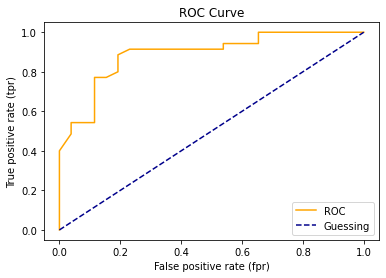

In [73]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    plt.plot([0, 1], [0, 1], color = 'darkblue', label = 'Guessing', ls = '--')
    
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [79]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs[:, 1])


0.8895604395604395

In [81]:
# 3.
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_preds, y_test)

array([[21,  7],
       [ 5, 28]], dtype=int64)

In [83]:
pd.crosstab(y_test, y_preds, rownames = ['Actual Labels'], colnames = ['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,21,5
1,7,28


In [84]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sande\Desktop\Deepu\ZTM\MachineLearning\SampleProject\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1k             |       h2bbff1b_0         4.8 MB
    seaborn-0.11.1             |     pyhd3eb1b0_0         212 KB
    ------------------------------------------------------------
                                           Total:         5.0 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.1-pyhd3eb1b0_0

The following packages will be UPDATED:

  openssl                                 1.1.1j-h2bbff1b_0 --> 1.1.1k-h2bbff1b_0




openssl-1.1.1k       | 4.8 MB    |            |   0% 
openssl-1.1.1k       | 4.8 MB    |            |   0% 
openssl-1.1.1k       | 4.8 MB    | 7          |   7



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.0

Please update conda by running

    $ conda update -n base -c defaults conda




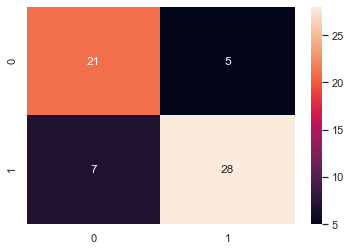

In [87]:
import seaborn as sns

sns.set(font_scale = 1)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat, annot = True);

In [ ]:
# 4.
# Classification Report